## Housing prices

Det er mye som påvirker en boligpris, mye mer enn antall soverom eller hvor mange peiser det er i huset. 
På dette datasettet skal jeg se på 79 ulike variabler som beskriver nesten alle aspektene ved boliger i Ames.
Også er tanken at man til slutt skal ende opp med å forutsi den endelige prisen på boligen.

## Setup

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

<Figure size 864x360 with 0 Axes>

In [3]:
np.random.seed(42)

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the data

In [5]:
final_test = pd.read_csv('Datasets/test.csv')
df = pd.read_csv('Datasets/train.csv')

#test = pd.read_csv('Datasets/test.csv')

OriginalData = df.copy()

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
final_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
df.iloc[:0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Her analyserer man salgsprisen, som man kan se er minimums prisen større enn 0.
Da vet man at man ikke har noe som kan ødelegged["SalePrice"].describe()

In [11]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
dfId = df.Id
testId = final_test.Id

## Discover and visualize the data to gain insights

Under ser man på forhold mellom tall variabler, her er Salgsprisen og kvadratfot over bakken plottet mot hverandre
ved hjelp av scatterplot.
Man kan se at disse to variablene har et linæert forhold. Jo større boligen er i kvadratfot, jo dyrere blir boligen

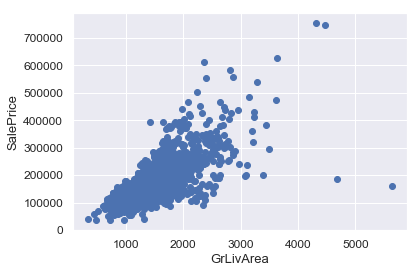

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [14]:
df["OverallQual"].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Man kan tenke seg at den helhetlige standarden/kvaiteten på et hus har noe å si når det kommer til salgsprisen på en bolig.
OverallQual er delt opp i 10 ulike kategorier. Man kan se at de fleste boligene tilhører kategori 6 - Above average. Når kvaliteten på et hus øker, så øker også prisen

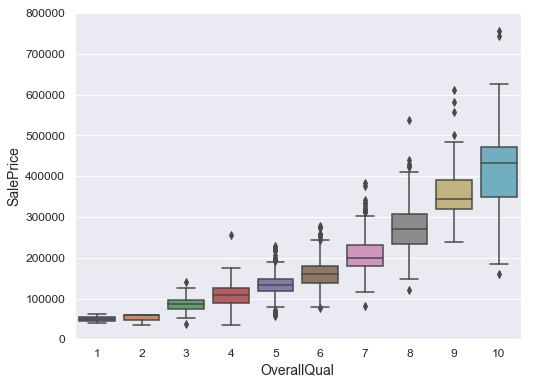

In [15]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [16]:
corr_matrix = df.corr()

Ved å bruke corr() metoden kan vi enkelt beregne standar korrelasjons koeffisienten mellom hver par av atributter.

Under får man ut korrelasjons verdiene, for å se forholdet imellom de ulie atributtene. Men kan se at noen atributter ikke har noe forhold til salgsprisen, de som er rundt 0.0 De atributtene som er nærmere 1.0 eller -1.0 har et sterkt forhold til saleprice Man kunne se over at forholdet mellom OverallQual og SalePrice var sterkt fra boxplottet, dette har vi nå fått bekreftet

In [17]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

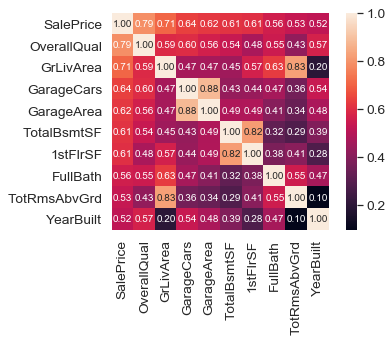

In [18]:
#saleprice correlation matrix
k = 10 #Tar bare med 10 atributter i dette 
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Prepare the data for Machine Learning algorithms 

Håndtering av manglende data. Under finner man ut hvilke kolonner som har manglende data og hvor mange prosent av dataen som faktisk mangler. Man får ut 20 atributter i stigende rekkefølge.

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Det er en manglende observasjon i Electrical, der den er NaN. 
Siden det bare er en, fjerner vi bare denne og beholder attributten.
Ellers så har man fjernet alle atributtene med manglende data

In [20]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

0

De verdiene som ikke hadde noe sterkt forhold til SalePrice med korrelasjons verdiene tar jeg og fjerner, altså de som var ganske nær 0.0 i corr_matrix.
Atributtene jeg dropper under, har ikke så mye å si for helheten på datasettet, derfor fjerner jeg de

In [21]:
df = df.drop(['MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold'], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 56 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-

In [23]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

pd.get_dummies er en funksjon i pandas for å gjøre om kategoriske atributter/verdier til dummy eller indikerende variabler.
pd.get_dummies lager en ny DataFrame som består av nullere og enere. Under ser jeg hvilke output jeg får ut når jeg bruker Pandas Get Dummies. 

In [24]:
pd.get_dummies(df).shape

(1459, 215)

Fikser numeriske attributter som egentlig er kategorier

In [25]:
df['OverallCond'] = df['OverallCond'].astype(str)
df['MSSubClass'] = df['MSSubClass'].apply(str)

StrattifiedShuffleSplit gjør at man kan dele datasette til train- og valideringset 

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['OverallQual']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

C:\Users\ingri\Anaconda3\envs\dat158\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


Verifiserer at splittingen var noen lunde korrekt.

In [27]:
strat_train_set["OverallQual"].value_counts() /len(strat_train_set)

5     0.272282
6     0.258570
7     0.218413
8     0.114594
4     0.075416
9     0.029383
3     0.015671
10    0.012733
2     0.001959
1     0.000979
Name: OverallQual, dtype: float64

In [28]:
df["OverallQual"].value_counts() /len(df)

5     0.271419
6     0.256340
7     0.218643
8     0.115147
4     0.079507
9     0.029472
3     0.013708
10    0.012337
2     0.002056
1     0.001371
Name: OverallQual, dtype: float64

In [29]:
strat_train_set.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
199,200,20,RL,9591,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,856,Y,0,26,0,170,0,WD,Normal,274900
415,416,20,RL,8899,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,396,Y,100,30,0,0,0,New,Partial,181134
466,467,20,RL,10628,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,526,Y,0,0,0,176,0,WD,Normal,167000
1322,1323,60,RL,10186,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,564,Y,240,39,0,0,0,WD,Normal,190000
156,157,20,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,625,Y,0,0,0,0,0,WD,Normal,109500


Under er en funksjon for å returnere alle kolonnene med verdier som har objekt som datatype

In [30]:
def objcolify(dataset):
    objcols = pd.Series()
    for i in dataset.columns:
        if dataset[i].dtype == 'O':
            objcols = objcols.append(pd.Series([i]), ignore_index=True)
    return objcols

Her setter man labels (Saleprice) ttil variabel y

In [31]:
y = strat_train_set['SalePrice'].copy()

Her setter man trainingset uten labels til variabel dft

In [32]:
dft = strat_train_set.drop(columns="SalePrice").copy()

In [33]:
dft = pd.get_dummies(dft)

Bruker Pipeline for å ta hånd om numeriske kolonner.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Under lager jeg en full_pipeline til å ta hånd om både numeriske og kategoriske kolonner. Etter jeg fant Get_dummies funksjonen i pandas fjernet jeg den kategoriske delen med One_hot_encoder, og brukte bare full_pipeline til å kalle på num_pipeline. 

In [35]:
from sklearn.compose import ColumnTransformer
num_attribs = list(dft)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])
trainset_prepared = full_pipeline.fit_transform(dft)

In [36]:
trainset_prepared

array([[-1.24575245, -0.09172788,  1.37383073, ..., -0.12210871,
         0.47196874, -0.30711464],
       [-0.73330226, -0.17809306,  0.64930533, ..., -0.12210871,
        -2.11878439,  3.25611313],
       [-0.61230707,  0.03769507,  0.64930533, ..., -0.12210871,
         0.47196874, -0.30711464],
       ...,
       [-1.138992  , -0.18046436,  0.64930533, ..., -0.12210871,
         0.47196874, -0.30711464],
       [ 0.21093468, -0.07188386, -0.07522007, ..., -0.12210871,
         0.47196874, -0.30711464],
       [-0.43911788,  0.13691518,  1.37383073, ..., -0.12210871,
         0.47196874, -0.30711464]])

Konverterer det forberedte datasettet til en dataframe

In [37]:
train = pd.DataFrame(trainset_prepared)
#test = pd.DataFrame(testset_prepared)

In [38]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,-1.245752,-0.091728,1.373831,1.111633,0.997958,1.433482,0.140669,1.503818,1.439940,-0.804881,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115
1,-0.733302,-0.178093,0.649305,1.211047,1.094942,-0.915046,1.689944,0.662197,0.472886,-0.804881,...,-0.054286,3.318398,-0.044302,-2.540188,-0.27338,-0.044302,-0.099454,-0.122109,-2.118784,3.256113
2,-0.612307,0.037695,0.649305,-0.015060,-0.699264,0.749231,-0.141833,0.520047,0.309550,-0.804881,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115
3,1.418514,-0.017469,0.649305,0.713977,0.367561,0.519675,-1.090231,-0.669053,-0.250460,1.183982,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115
4,-1.347768,-0.390137,-0.799745,-0.677820,-1.669105,-0.968020,-1.260629,-2.361320,-0.304905,-0.804881,...,-0.054286,-0.301350,-0.044302,0.393672,-0.27338,-0.044302,-0.099454,-0.122109,0.471969,-0.307115


Lager en duplikat av de orginale labelsene. 

In [39]:
train.info()
y_original = y.copy
y=y.reset_index().drop(columns='index')['SalePrice']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Columns: 228 entries, 0 to 227
dtypes: float64(228)
memory usage: 1.8 MB


Funksjon for å skrive ut predictions og labels

In [40]:
def print_preds_labels(preds, labels):
   
    print('Preds:                labels:')
    for i in range (len(preds)):
        print(preds[i], labels[i], sep='  #  ')

## Select model and train it

Trener en linear-regresjonsmodell, der jeg bruker train og y

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Tester modellen på et lite testsett

In [42]:
some_data = dft.iloc[:10]
some_labels = y.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)

preds = pd.Series(lin_reg.predict(some_data_prepared))
print_preds_labels(preds = preds, labels = some_labels)


Preds:                labels:
320676.6259756032  #  274900
193512.62597560318  #  181134
179716.62597560318  #  167000
243484.62597560318  #  190000
100404.62597560318  #  109500
118160.62597560318  #  89471
185500.62597560318  #  179600
159532.62597560318  #  160000
220840.62597560318  #  187750
107908.62597560318  #  120500


Så sjekker man RMSE og MAE

In [43]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20370.67184620163

In [44]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, housing_predictions)
lin_mae

13673.33093607408

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [46]:
housing_predictions = tree_reg.predict(train)
tree_mse = mean_squared_error(y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [47]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=100)
rfg.fit(train, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
housing_predictions = rfg.predict(train)
rfg_mse = mean_squared_error(y, housing_predictions)
rfg_rmse = np.sqrt(rfg_mse)
rfg_rmse

10458.585731239991

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train, y,
                                scoring="neg_mean_squared_error", cv=None)
tree_rmse_scores = np.sqrt(-scores)

C:\Users\ingri\Anaconda3\envs\dat158\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [50]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [40023.62181244 39496.83364964 41510.15754873]
Mean: 40343.537670270125
Standard deviation: 852.4974673414588


In [51]:
rfg_scores = cross_val_score(rfg, train, y,
                             scoring="neg_mean_squared_error", cv=10)
rfg_rmse_scores = np.sqrt(-rfg_scores)
display_scores(rfg_rmse_scores)

Scores: [25715.83588025 25345.7432515  24871.93994826 25888.65954112
 32970.9353787  27749.44351761 23995.79234363 20501.47107864
 41596.84084728 28284.78578896]
Mean: 27692.144757593505
Standard deviation: 5545.692295217746


In [52]:
print('Lin_reg: ', lin_reg.score(train, y))
print('Tree_reg: ', tree_reg.score(train,y))
print('Forest_reg: ', rfg.score(train,y))

Lin_reg:  0.9279610533769005
Tree_reg:  1.0
Forest_reg:  0.9810109792148256


Så langt er det Randomforest som er den beste modellen. 

Prøver med catboost

In [53]:
new_data = OriginalData.copy()
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for new_train_index, new_test_index in split.split(new_data, new_data['OverallQual']):
    new_strat_train_set = new_data.loc[new_train_index]
    new_strat_test_set = new_data.loc[new_test_index]

In [54]:
new_objcols = objcolify(new_data)

for header in new_objcols:
    new_strat_train_set[header] = new_strat_train_set[header].astype('category').cat.codes
    new_strat_test_set[header] = new_strat_test_set[header].astype('category').cat.codes

In [55]:
label = 'SalePrice'
new_train_y = new_strat_train_set[label]
new_train_X = new_strat_train_set.drop(label, axis=1) # remove labels
new_test_y  = new_strat_test_set[label]
new_test_X  = new_strat_test_set.drop(label, axis=1) # remove labels

In [56]:
from catboost import CatBoostRegressor

cbm = CatBoostRegressor(iterations=500, depth=3, learning_rate=0.1)
cat_dims = [new_train_X.columns.get_loc(i) for i in new_objcols[:-1]] 
cbm.fit(new_train_X, new_train_y, cat_features=cat_dims, eval_set=(new_test_X, new_test_y))

0:	learn: 177751.2022729	test: 185695.6521029	best: 185695.6521029 (0)	total: 96.9ms	remaining: 48.3s
1:	learn: 161836.3064634	test: 170076.9792958	best: 170076.9792958 (1)	total: 135ms	remaining: 33.6s
2:	learn: 147850.6508392	test: 156342.6549936	best: 156342.6549936 (2)	total: 175ms	remaining: 29s
3:	learn: 135235.3677652	test: 143576.6550638	best: 143576.6550638 (3)	total: 212ms	remaining: 26.2s
4:	learn: 124084.8614764	test: 132623.1604015	best: 132623.1604015 (4)	total: 253ms	remaining: 25.1s
5:	learn: 114009.2588832	test: 122835.3882675	best: 122835.3882675 (5)	total: 289ms	remaining: 23.8s
6:	learn: 104871.4200678	test: 114225.1572218	best: 114225.1572218 (6)	total: 336ms	remaining: 23.7s
7:	learn: 97017.1152031	test: 106586.9300065	best: 106586.9300065 (7)	total: 379ms	remaining: 23.3s
8:	learn: 89988.2187050	test: 99615.1244932	best: 99615.1244932 (8)	total: 417ms	remaining: 22.7s
9:	learn: 83805.8619207	test: 93490.1573636	best: 93490.1573636 (9)	total: 455ms	remaining: 22.3

87:	learn: 23576.5384182	test: 37310.4193851	best: 37308.6045206 (86)	total: 3.83s	remaining: 17.9s
88:	learn: 23549.3709102	test: 37312.4916014	best: 37308.6045206 (86)	total: 3.87s	remaining: 17.9s
89:	learn: 23494.3885732	test: 37239.1033800	best: 37239.1033800 (89)	total: 3.92s	remaining: 17.9s
90:	learn: 23468.9306479	test: 37179.5770049	best: 37179.5770049 (90)	total: 3.97s	remaining: 17.8s
91:	learn: 23425.7691228	test: 37110.8196787	best: 37110.8196787 (91)	total: 4s	remaining: 17.8s
92:	learn: 23374.6940442	test: 37069.6853027	best: 37069.6853027 (92)	total: 4.05s	remaining: 17.7s
93:	learn: 23336.7053580	test: 37024.5410509	best: 37024.5410509 (93)	total: 4.09s	remaining: 17.7s
94:	learn: 23222.9538319	test: 36901.6511057	best: 36901.6511057 (94)	total: 4.14s	remaining: 17.6s
95:	learn: 23209.0512537	test: 36895.6195385	best: 36895.6195385 (95)	total: 4.17s	remaining: 17.6s
96:	learn: 23151.0167208	test: 36876.2608735	best: 36876.2608735 (96)	total: 4.22s	remaining: 17.5s
97:

169:	learn: 20830.0086269	test: 35544.9824025	best: 35540.8937212 (166)	total: 7.32s	remaining: 14.2s
170:	learn: 20821.8673666	test: 35540.9548359	best: 35540.8937212 (166)	total: 7.37s	remaining: 14.2s
171:	learn: 20805.8311147	test: 35565.7436079	best: 35540.8937212 (166)	total: 7.4s	remaining: 14.1s
172:	learn: 20768.2158159	test: 35520.9350083	best: 35520.9350083 (172)	total: 7.45s	remaining: 14.1s
173:	learn: 20761.0892713	test: 35520.8787669	best: 35520.8787669 (173)	total: 7.48s	remaining: 14s
174:	learn: 20753.9071064	test: 35491.1494600	best: 35491.1494600 (174)	total: 7.53s	remaining: 14s
175:	learn: 20701.7677207	test: 35424.9740118	best: 35424.9740118 (175)	total: 7.57s	remaining: 13.9s
176:	learn: 20695.8615583	test: 35429.6112546	best: 35424.9740118 (175)	total: 7.62s	remaining: 13.9s
177:	learn: 20685.2800746	test: 35410.1531640	best: 35410.1531640 (177)	total: 7.65s	remaining: 13.8s
178:	learn: 20633.4536277	test: 35352.1270998	best: 35352.1270998 (178)	total: 7.7s	rem

250:	learn: 19363.0522968	test: 34856.8754594	best: 34847.4382896 (244)	total: 10.9s	remaining: 10.8s
251:	learn: 19309.4961187	test: 34849.0257972	best: 34847.4382896 (244)	total: 10.9s	remaining: 10.8s
252:	learn: 19302.1261457	test: 34838.7760731	best: 34838.7760731 (252)	total: 11s	remaining: 10.7s
253:	learn: 19299.3261571	test: 34824.3951843	best: 34824.3951843 (253)	total: 11s	remaining: 10.7s
254:	learn: 19297.5565019	test: 34828.7756398	best: 34824.3951843 (253)	total: 11.1s	remaining: 10.6s
255:	learn: 19274.4572775	test: 34800.7164500	best: 34800.7164500 (255)	total: 11.1s	remaining: 10.6s
256:	learn: 19230.7167397	test: 34760.6195264	best: 34760.6195264 (256)	total: 11.2s	remaining: 10.6s
257:	learn: 19172.7798035	test: 34694.6080387	best: 34694.6080387 (257)	total: 11.2s	remaining: 10.5s
258:	learn: 19165.5980058	test: 34678.0968236	best: 34678.0968236 (258)	total: 11.3s	remaining: 10.5s
259:	learn: 19165.1252213	test: 34678.7920627	best: 34678.0968236 (258)	total: 11.3s	r

331:	learn: 18310.4043218	test: 34393.3162278	best: 34393.2135551 (328)	total: 14.7s	remaining: 7.44s
332:	learn: 18302.6037361	test: 34378.4033291	best: 34378.4033291 (332)	total: 14.8s	remaining: 7.4s
333:	learn: 18287.7887776	test: 34373.4400723	best: 34373.4400723 (333)	total: 14.8s	remaining: 7.36s
334:	learn: 18287.2926465	test: 34373.9435825	best: 34373.4400723 (333)	total: 14.9s	remaining: 7.31s
335:	learn: 18287.0637127	test: 34375.9297966	best: 34373.4400723 (333)	total: 14.9s	remaining: 7.27s
336:	learn: 18286.8618110	test: 34375.8702790	best: 34373.4400723 (333)	total: 15s	remaining: 7.23s
337:	learn: 18273.8757825	test: 34340.6606440	best: 34340.6606440 (337)	total: 15s	remaining: 7.19s
338:	learn: 18273.0576615	test: 34336.3524270	best: 34336.3524270 (338)	total: 15s	remaining: 7.14s
339:	learn: 18268.1866599	test: 34325.1115113	best: 34325.1115113 (339)	total: 15.1s	remaining: 7.1s
340:	learn: 18267.3389293	test: 34323.9997388	best: 34323.9997388 (340)	total: 15.1s	remai

415:	learn: 17686.2298142	test: 34135.1901679	best: 34133.3721404 (410)	total: 18.6s	remaining: 3.76s
416:	learn: 17679.4982505	test: 34141.0014606	best: 34133.3721404 (410)	total: 18.7s	remaining: 3.72s
417:	learn: 17641.6885184	test: 34152.1574578	best: 34133.3721404 (410)	total: 18.7s	remaining: 3.68s
418:	learn: 17625.2459184	test: 34132.6557476	best: 34132.6557476 (418)	total: 18.8s	remaining: 3.63s
419:	learn: 17622.3687949	test: 34132.5728391	best: 34132.5728391 (419)	total: 18.8s	remaining: 3.59s
420:	learn: 17560.0356265	test: 34172.9542676	best: 34132.5728391 (419)	total: 18.9s	remaining: 3.54s
421:	learn: 17540.7879803	test: 34166.6612216	best: 34132.5728391 (419)	total: 18.9s	remaining: 3.5s
422:	learn: 17538.6160099	test: 34175.5269641	best: 34132.5728391 (419)	total: 19s	remaining: 3.45s
423:	learn: 17537.0871634	test: 34182.7321946	best: 34132.5728391 (419)	total: 19s	remaining: 3.41s
424:	learn: 17536.3179511	test: 34180.8626930	best: 34132.5728391 (419)	total: 19.1s	re

496:	learn: 17040.9516805	test: 34173.6287276	best: 34132.5728391 (419)	total: 22.5s	remaining: 136ms
497:	learn: 17033.9956503	test: 34165.4095954	best: 34132.5728391 (419)	total: 22.5s	remaining: 90.4ms
498:	learn: 17032.3816986	test: 34166.0366230	best: 34132.5728391 (419)	total: 22.6s	remaining: 45.2ms
499:	learn: 17032.2109850	test: 34166.0103742	best: 34132.5728391 (419)	total: 22.6s	remaining: 0us

bestTest = 34132.57284
bestIteration = 419

Shrink model to first 420 iterations.


In [57]:
cbm_rmse = cbm.score(new_train_X,new_train_y)

In [58]:
print('Lin_RMSE:    ', lin_rmse)
print('Tree_RMSE:   ', tree_rmse)
print('Forest_RMSE: ', rfg_rmse)
print('cbm_RMSE:    ', cbm_rmse)

Lin_RMSE:     20370.67184620163
Tree_RMSE:    0.0
Forest_RMSE:  10458.585731239991
cbm_RMSE:     17875.740207253708


Det ser ut som om det er ForestRegressor som ender opp med det beste resultatet

## Fine-tune the model

Når man nå står igjen med noen få lovende modeller, så trenger man å finjustere disse. Det er flere måte man kan gjøre dette på. GridSearch kunne for eksempel vært en måte. Det man gjør er å endre hyperparameterne for å finne en bra kombinasjon av verdier GridSearch gjør dette ved at man sier hvilke hyperparameter man vil eksprimentere med og hvilke verdier man vil prøve Så den vurderer de ulike kombinasjonene og finner den beste kombinasjonen av hyperparameter verdier

RandomizedSearch kan bli brukt på samme måte som GridSearch klassen.
Det randomizedSearch gjør er å evaluere et gitt nummer av tilfeldige kombinasjoner ved å velge en tilfeldig verdi for hver av hyperparameterene ved hver iterasjon

In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Nummer av trær i random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Nummer av features å ta i betraktning ved hvaer split
max_features = ['auto', 'sqrt']
# Maksimum nummer av level i tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum nummer av samples nødvendig til å splitte en node
min_samples_split = [2, 5, 10]
# Minimum nummer av samples nødvendig på hver leaf node
min_samples_leaf = [1, 2, 4]
# Metode for å velge samples for training hvert tre
bootstrap = [True, False]
# Lager random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
# Bruker random grid til å søke etter de beste hyperparameterene
# Først lager man base model til å tune
rf = RandomForestRegressor()
# Random search av parametere, bruker 3 fold cross validation, 
# søker igjennom 100 forskjellige kombinasjoner, og bruker alle tiljengelige kjerner
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [62]:
def evaluate(model, train, y):
    predictions = model.predict(train)
    errors = abs(predictions - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(train, y)
base_accuracy = evaluate(base_model, train, y)


best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, train, y)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Tuned model Score: ', best_random.score(train, y))
print('Base model Score: ', base_model.score(train, y))

Model Performance
Average Error: 6489.0594 degrees.
Accuracy = 96.08%.
Model Performance
Average Error: 1.7434 degrees.
Accuracy = 100.00%.
Improvement of 4.08%.
Tuned model Score:  0.999999984506091
Base model Score:  0.9810109792148256


## Present your solution

Modellen jeg endte opp med er random forest. Denne modellen ga det mest lovende resultatet, fra begynnelsen av. Jeg tunet modellen med ulike hyperparametere. Når jeg brukte modell score funksjonen, så kan vi se at modellen vår beskriver rundt 98% av datasettet. 

Dette resultatet er vel kanskje for bra for å være sant, og dette er det en grunn til. Siden jeg ikke har brukt evaluation set eller test settet